# Part I - (Ford GoBike System Data)
## by (Robert Ombati)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The Features included in the Data are as follows : - Member Year of Birth - Member Gender - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) - Trip Duration(in seconds) - Bike ID - Start Time and Date - End Time and Date - Start Station ID - End Station ID - Start Station Name - End Station Name - End Station Latitude - End Station Longitude - Start Station Latitude - Start Station Longitude




## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties and understand its structure.

In [2]:
#load the data into dataframe and display 10 rows for visual assessment.
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# display the shape of the dataframe
df.shape

(183412, 16)

In [4]:
#display the data details to identify missing values and wrong data type for the cleaning stage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#display sum of missing values per column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#display the list of columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

## Data Cleaning

In [7]:
#We have a lot of empty rows that I do recommend to drop them
df = df.dropna()
# test the code
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# list of column with no value to drop
to_drop = ['start_station_latitude', 
           'start_station_longitude', 
           'end_station_latitude',
           'end_station_longitude', 
           'start_station_id', 
           'bike_id', 
           'end_station_id']
#We should also drop the columns that have no value to our exploratory and explanatory plotting
df.drop(to_drop, inplace=True, axis=1)

In [9]:
#test the code
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [10]:
#display the pivot table of the cleaned data
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No


In [11]:
#shape of cleaned data
df.shape

(174952, 9)

In [12]:
#convert the start_time and end_time from object to datetime
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [13]:
df["duration_min"] = df["duration_sec"]/60
df.drop('duration_sec', inplace=True, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   end_station_name         174952 non-null  object        
 4   user_type                174952 non-null  object        
 5   member_birth_year        174952 non-null  float64       
 6   member_gender            174952 non-null  object        
 7   bike_share_for_all_trip  174952 non-null  object        
 8   duration_min             174952 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 13.3+ MB


### What is the structure of your dataset?
Original dataset constitute of 183412 rows and 16 columns 
cleaned  dataset constitute of 174952 rows , and 9 columns

### What is/are the main feature(s) of interest in your dataset?

Duration of each trip, customer type, gender and Age of users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Numerical data that is mainly the colum related with duration of each trip

categorical data related to user type, gender, Age

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [15]:
#display the first 20 prefered end station
df.end_station_name.value_counts()[:20]

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4624
Market St at 10th St                                               3709
Montgomery St BART Station (Market St at 2nd St)                   3461
San Francisco Ferry Building (Harry Bridges Plaza)                 3151
San Francisco Caltrain (Townsend St at 4th St)                     2870
Powell St BART Station (Market St at 4th St)                       2854
Berry St at 4th St                                                 2782
The Embarcadero at Sansome St                                      2341
Steuart St at Market St                                            2264
Powell St BART Station (Market St at 5th St)                       2153
Howard St at Beale St                                              1970
Beale St at Harrison St                                            1780
Bancroft Way at Telegraph Ave                                      1780
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

In [1]:
# Return the Series having unique values
x = df['end_station_name'].unique()

# Return the Series having frequency count of each unique value
y = df['end_station_name'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('end_station_name')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

NameError: name 'df' is not defined

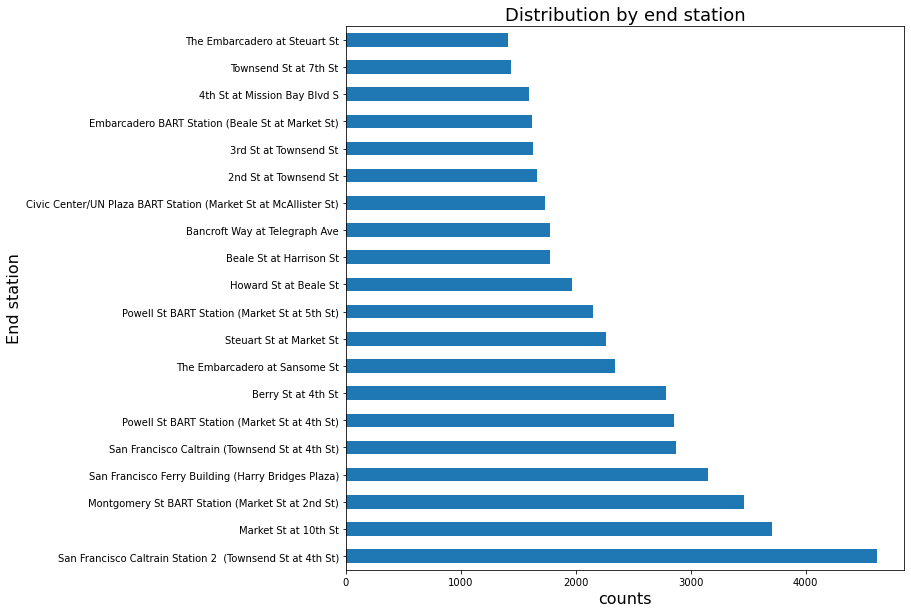

In [16]:
#plotting horizontal bar for the first 20 most used  start stations
plt.figure(figsize = (10,10))
df['end_station_name'].value_counts()[:20].plot(kind='barh')
plt.xlabel('counts', fontsize = 16)
plt.title('Distribution by end station', fontsize = 18)
plt.ylabel('End station', fontsize = 16);

The graph show the most first 20 end station that were used with San Francisco Caltrain Station 2  (Townsend St at 4th St)  being the most prefered ending point

## Start station name distribution

In [17]:
#display count of the first 20 stations 
df.start_station_name.value_counts()[:20]


Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3408
Berry St at 4th St                                                 2952
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2577
San Francisco Ferry Building (Harry Bridges Plaza)                 2541
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

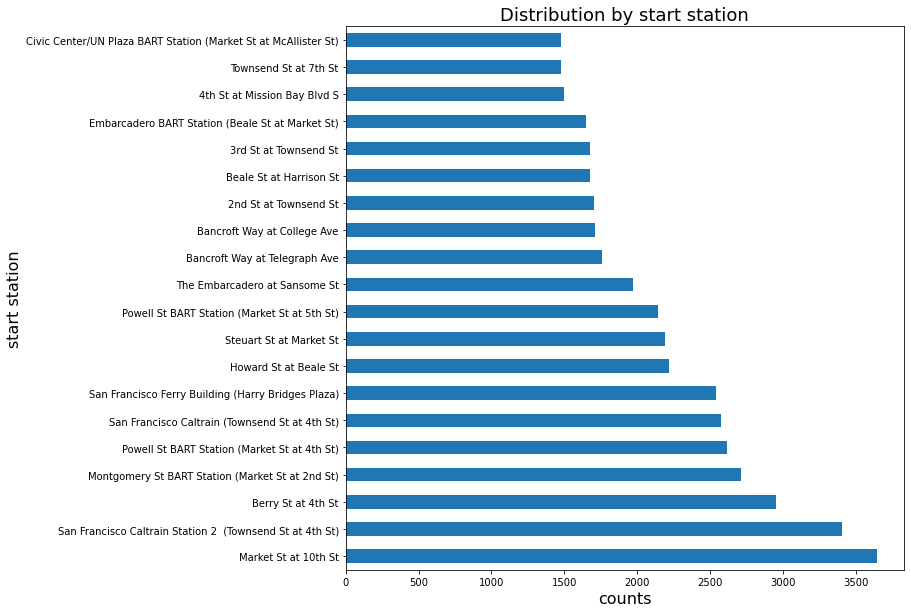

In [18]:
#plotting horizontal bar for the first 20 most used  start stations
plt.figure(figsize = (10,10))
df['start_station_name'].value_counts()[:20].plot(kind='barh')
plt.xlabel('counts', fontsize = 16)
plt.title('Distribution by start station', fontsize = 18)
plt.ylabel('start station', fontsize = 16);

The graph show the most first 20 start station that were used with Market St at 10th St being the most prefered starting point.

## Average duration of trips in minutes

In [19]:
# trip duration frequency
df.duration_min.value_counts()

4.533333      308
5.383333      285
5.083333      282
6.150000      280
5.100000      276
             ... 
68.000000       1
47.116667       1
136.650000      1
66.550000       1
47.033333       1
Name: duration_min, Length: 4429, dtype: int64

In [20]:
#Trip duration general statistics

df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

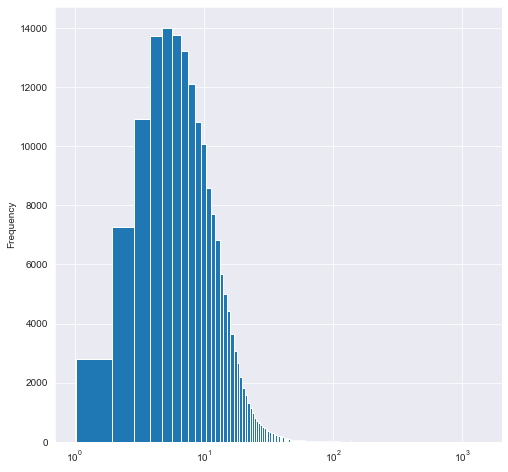

In [21]:
#histogram showing duration of a trip in minutes
plt.figure(figsize =(8,8))
sb.set_style('darkgrid')
df.duration_min.plot.hist(bins=1500)
plt.xscale('log')
plt.show()


As we can easily interpret from the above plot, a majority of folks have a tendency towards using the bikes for a short-time durational trips (around 10 mins).

## What is the user type distribution?

In [22]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

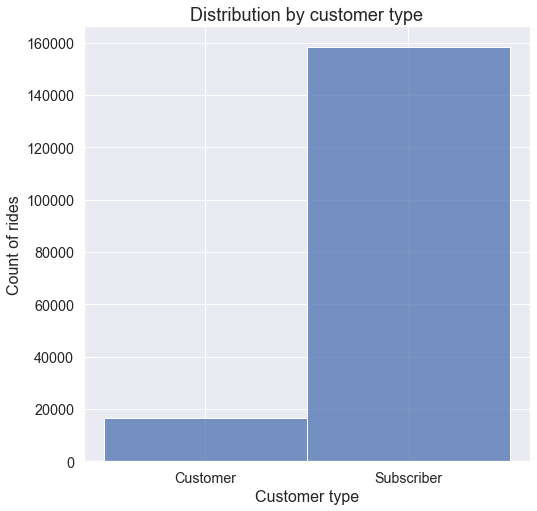

In [23]:
plt.figure(figsize =(8,8))
sb.set_style('darkgrid')
sb.set(font_scale=1.3)
plt.xlabel("Customer type", fontsize = 16)
plt.ylabel("Count of rides", fontsize = 16)
plt.title("Distribution by customer type", fontsize = 18)
sb.histplot(x='user_type', data=df);

From the above histogram, we can conclude that they are more Subscriber than customers who uses the bike for travelling

In [24]:
df.user_type.value_counts('Customer')*100

Subscriber    90.531117
Customer       9.468883
Name: user_type, dtype: float64

From the above histogram, we can conclude that subscribers represents 90.5% of all users

## What is the Gender Distribution?

In [25]:
#Gender categories
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

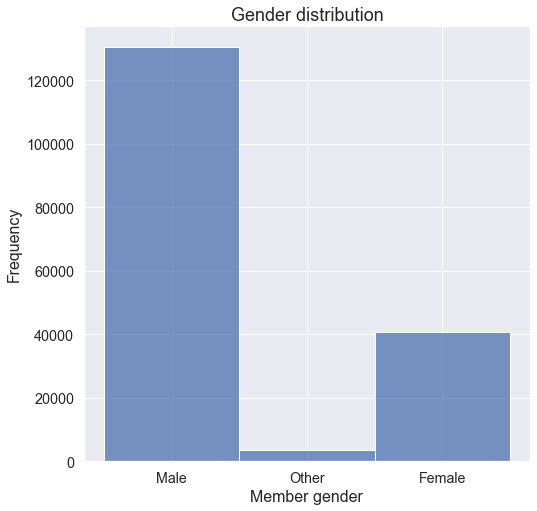

In [26]:
#plotting histogram
plt.figure(figsize =(8,8))
sb.set_style('darkgrid')
sb.set(font_scale=1.3)
plt.xlabel("Member gender", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.title("Gender distribution", fontsize = 18)
sb.histplot(x='member_gender', data=df);


From the above histogram we can see that of all users there are more male than female who uses the system

In [27]:
#Gender categories
df.member_gender.value_counts('Male')*100

Male      74.591888
Female    23.323540
Other      2.084572
Name: member_gender, dtype: float64

From the above histogram we can see that of all users 74.59% are 23.32% are female and 2% are other undisclosed gender

## What is the age distribution.

In [28]:
# define the variable 'age'
df['Age'] = datetime.now().year -df.member_birth_year

In [29]:
df['Age'].value_counts()

34.0     10214
29.0      9323
33.0      8967
32.0      8640
31.0      8484
         ...  
94.0         1
144.0        1
92.0         1
112.0        1
95.0         1
Name: Age, Length: 75, dtype: int64

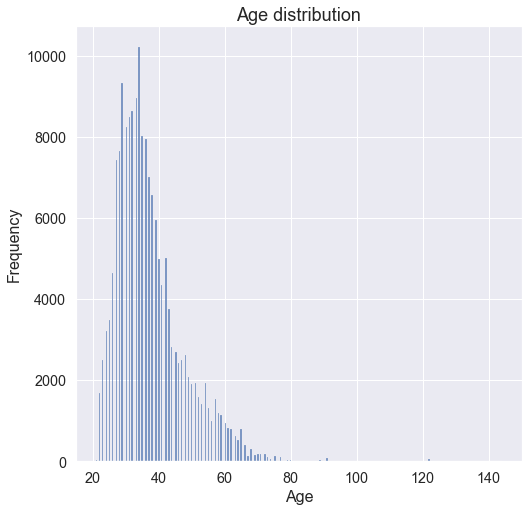

In [30]:
#plotting histogram
plt.figure(figsize =(8,8))
sb.set_style('darkgrid')
sb.set(font_scale=1.3)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.title("Age distribution", fontsize = 18)
sb.histplot(x='Age', data=df);

There are more users between the age of 25 to 40 years, the number reduces steadily from age 40 to 100. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was a case of the third gender in the gender distribution graph which was not disclosed, However the i saw that the impact is too small to carry out any data transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusal distributuons. Each variable explored showed what you would expect.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Trip duration and Gender

In [31]:
male = df['member_gender'] == 'Male'
female = df['member_gender'] =='Female'
other = df['member_gender'] =='Other'

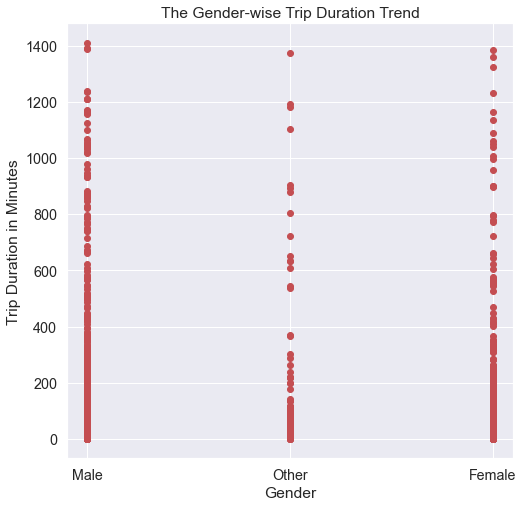

In [32]:
#A scatter plot showing comparisons between quatitative and categorical variables

plt.figure(figsize = [8,8])  
plt.scatter(data = df , x = 'member_gender' , y = 'duration_min' , alpha = 1, color = 'r')
plt.title('The Gender-wise Trip Duration Trend')
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minutes');

scatter does show that female and other gender have a higher trip duration than the majority males. Most of males have trip duration of between 0 and 400 minutes.

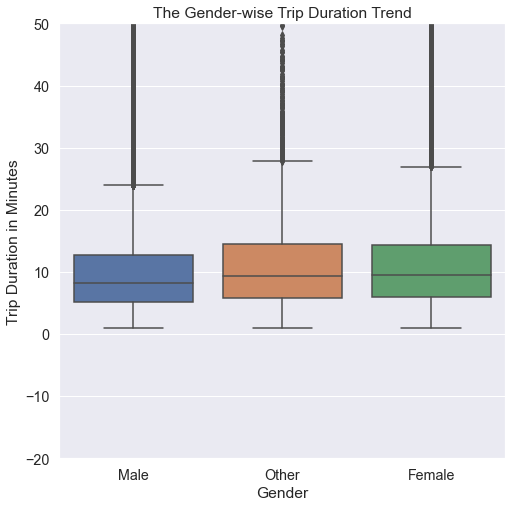

In [33]:
#A box plot showing comparisons between quatitative and categorical variables
plt.figure(figsize = [8,8])  
sb.boxplot(data = df , x = 'member_gender' , y = 'duration_min')
plt.ylim(-20, 50)
plt.title('The Gender-wise Trip Duration Trend')
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minutes');

boxplot does show that female and other gender have a higher trip duration than males

In [34]:
#calculating avarage trip duration for the male gender
df[male].duration_min.mean()

11.206580842912022

In [35]:
#calculating maximum trip duration for the male gender
df[male].duration_min.max()

1409.1333333333334

In [36]:
#calculating avarage trip duration for the female gender
df[female].duration_min.mean()

12.981212678184901

In [37]:
#calculating maximum trip duration for the female gender

df[female].duration_min.max()

1386.5833333333333

In [38]:
#calculating average trip duration for the other gender
df[other].duration_min.mean()

16.62214148615301

In [39]:
#calculating maximum trip duration for the other gender

df[other].duration_min.max()

1375.2

## Trip duration and user type

In [40]:
customer = df['user_type'] == 'Customer'
subscriber = df['user_type'] == 'Subscriber'

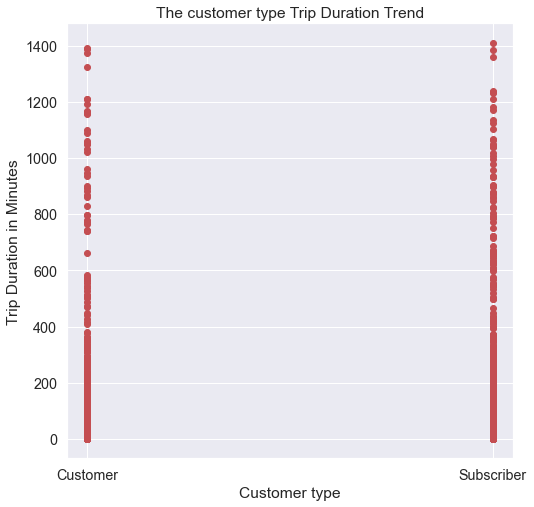

In [41]:
#A scatter plot showing comparisons between quatitative and categorical variables

plt.figure(figsize = [8,8]) 
 
plt.scatter(data = df , x = 'user_type' , y = 'duration_min', color = 'r' )
plt.title('The customer type Trip Duration Trend')
plt.xlabel('Customer type')
plt.ylabel('Trip Duration in Minutes');

scatter plot does show that Customers have a higher trip duration than Subscribers and that majority of scustomers have trip duration up to 600 minutes while subscriber upto 450 minutes

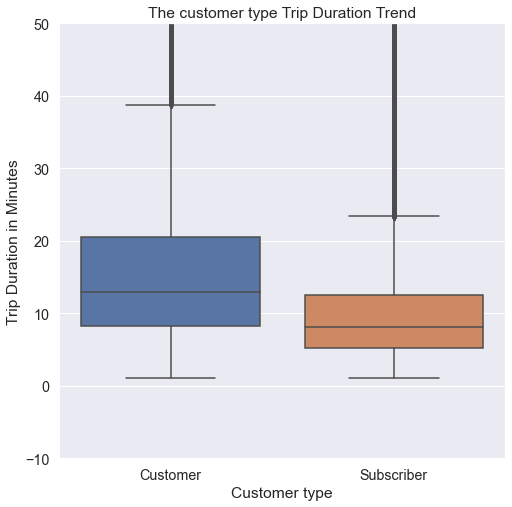

In [42]:
#A box plot showing comparisons between quatitative and categorical variables

plt.figure(figsize = [8,8]) 
sb.boxplot(data = df , x = 'user_type' , y = 'duration_min')
plt.ylim(-10, 50)
plt.title('The customer type Trip Duration Trend')
plt.xlabel('Customer type')
plt.ylabel('Trip Duration in Minutes');

boxplot does show that Customers have a higher trip duration than Subscribers

In [43]:
# Calcurating the average trip duration for subscriber
df[subscriber].duration_min.mean()

10.675855083993271

In [44]:
# Calcurating the maximum trip duration for subscriber
df[subscriber].duration_min.max()

1409.1333333333334

In [45]:
# Calcurating the average trip duration for customer
df[customer].duration_min.mean()

21.844268381021383

In [46]:
# Calcurating the maximum trip duration for customer
df[customer].duration_min.max()

1391.9833333333333

## Age Vs user type

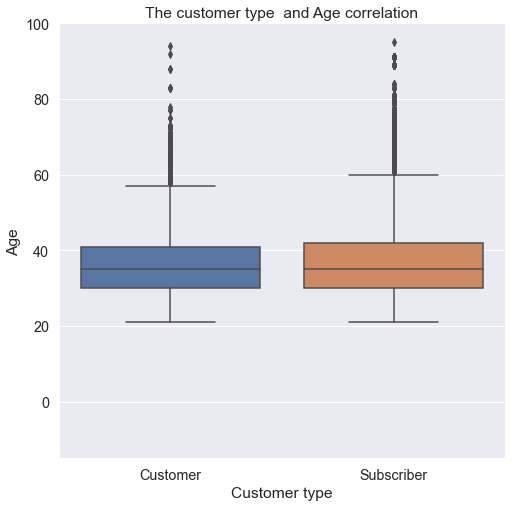

In [47]:
plt.figure(figsize = [8,8]) 
sb.boxplot(data = df , x = 'user_type' , y = 'Age')
plt.ylim(-15, 100)
plt.title('The customer type  and Age correlation')
plt.xlabel('Customer type')
plt.ylabel('Age');

The age distribution among the customer user type was almost same

## Trip duration and Age of users

In [48]:
#Age frequency values for the largest 10

df['Age'].value_counts().nlargest(25)

34.0    10214
29.0     9323
33.0     8967
32.0     8640
31.0     8484
30.0     8245
35.0     8010
36.0     7953
28.0     7654
27.0     7420
37.0     7023
38.0     6557
39.0     5953
42.0     5011
40.0     4987
26.0     4637
41.0     4344
43.0     3756
25.0     3476
24.0     3208
44.0     2830
45.0     2706
48.0     2633
23.0     2504
47.0     2503
Name: Age, dtype: int64

In [49]:
#calculating the % composition for each age
df['Age'].value_counts(34.0)*100

34.0     5.838173
29.0     5.328890
33.0     5.125406
32.0     4.938497
31.0     4.849330
           ...   
94.0     0.000572
144.0    0.000572
92.0     0.000572
112.0    0.000572
95.0     0.000572
Name: Age, Length: 75, dtype: float64

In [50]:
# Age statistics
df['Age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Trip Duration in Minutes')

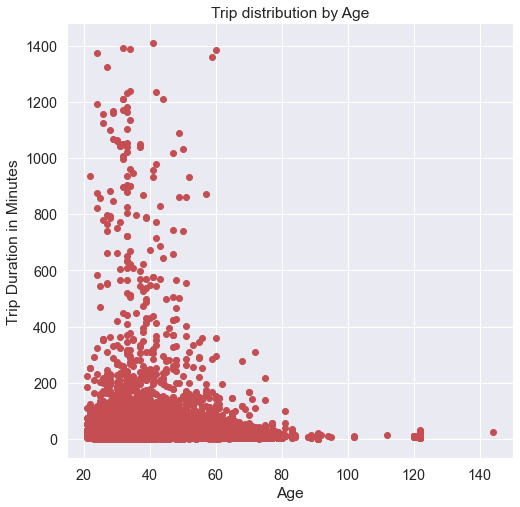

In [51]:
# showing comparisons between quatitative and categorical variables(duration of trip and age)

plt.figure(figsize = [8,8]) 

plt.scatter(data = df , x = 'Age' , y = 'duration_min', color = 'r' )
plt.title('Trip distribution by Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes')

Most Folks with ages between 20-50 years have trip duration of between 0 to 200 minutes. Majority of folks of ages above spends less time in their trips

## Age vs user type

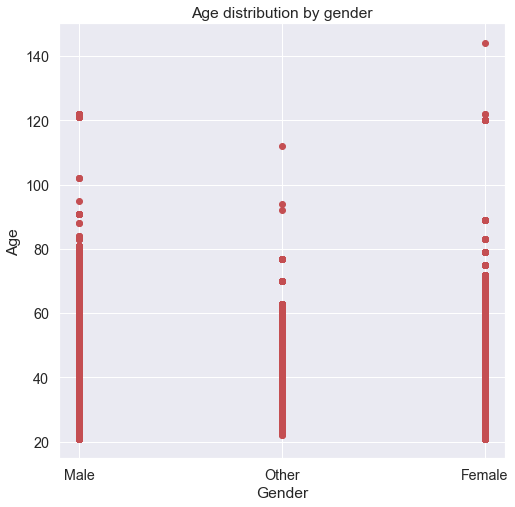

In [52]:
# showing comparisons between quatitative and categorical variables(duration of trip and age)

plt.figure(figsize = [8,8]) 

plt.scatter(data = df , x = 'member_gender' , y = 'Age', color = 'r')
plt.title('Age distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Age');

They are more old men of 80 years and above than female and gender who uses the bike system.
The oldest folk who used the bike was a female

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased with an increase in age not surprisingly.
>I also found that among users, an actual customer is spending more time on a bike trip than subscribers
> When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

n/a

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   end_station_name         174952 non-null  object        
 4   user_type                174952 non-null  object        
 5   member_birth_year        174952 non-null  float64       
 6   member_gender            174952 non-null  object        
 7   bike_share_for_all_trip  174952 non-null  object        
 8   duration_min             174952 non-null  float64       
 9   Age                      174952 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 14.7+ MB


<Figure size 1080x720 with 0 Axes>

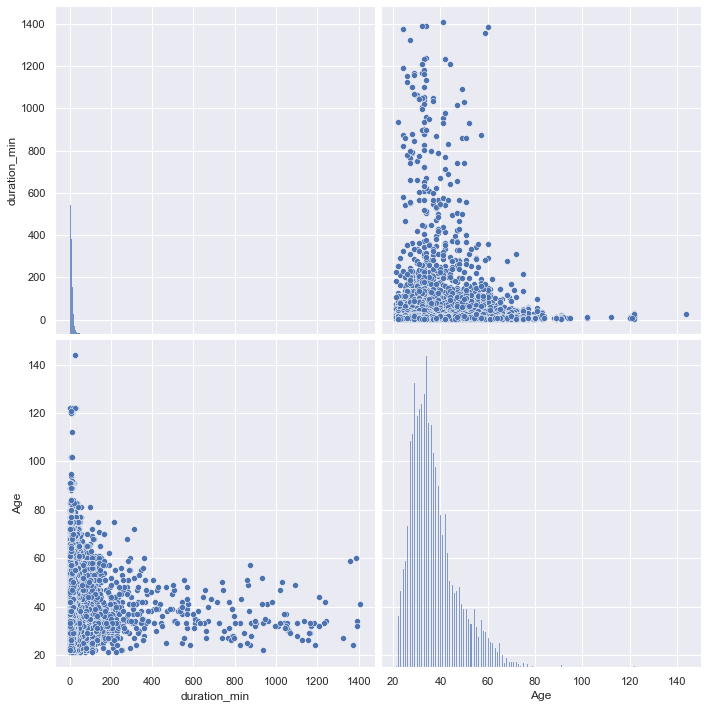

In [54]:
plt.figure(figsize=[15,10])
sb.set()
cols = ['member_gender', 'duration_min', 'Age', 'user_type']

sb.pairplot(df[cols], height = 5)
plt.show();

Another interesting insight here is that folks whose age is below 80 years are have higher trip duration

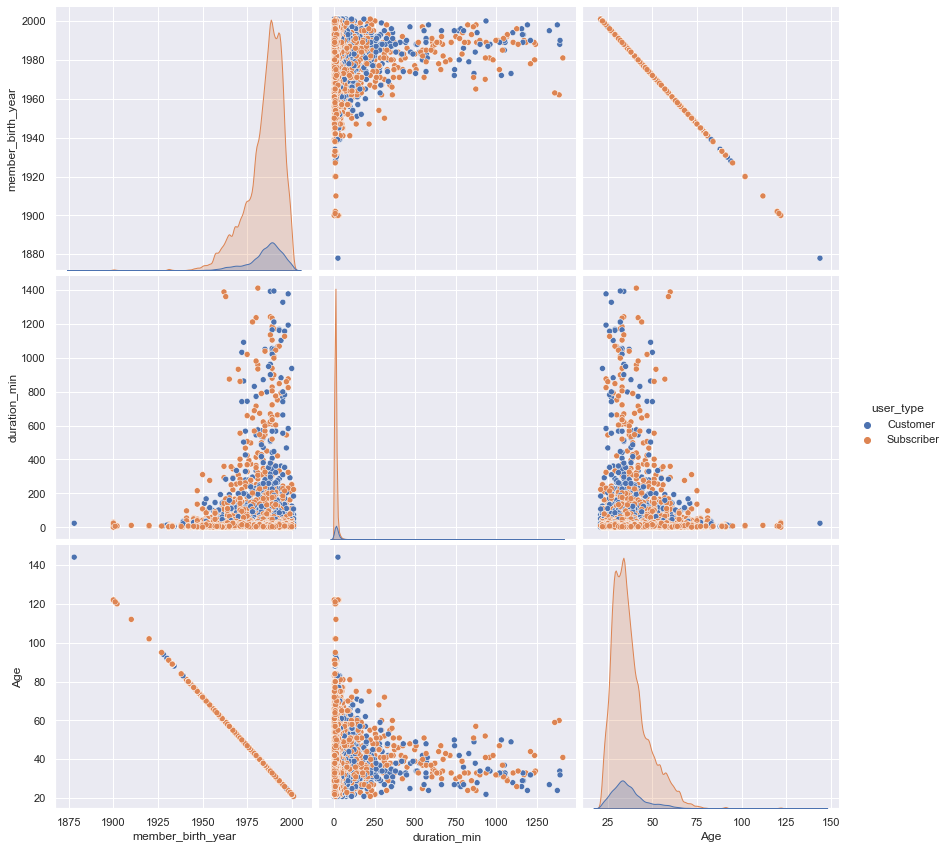

In [55]:
sb.pairplot(df, hue = 'user_type', height=4)
plt.show();

From the above plots, we can conclude that the count of Customers is much more than the Subscribers. Hence, i would say that the user-type does have an impact on trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the above plots, we can conclude that the count of Customers is much more than the Subscribers. Hence, i would say that the user-type does have an impact on trip duration.

>

### Were there any interesting or surprising interactions between features?

>One interesting insight obtained here is that the Subscribers have a tendency to rent out the bikes for longer trips.

>Another interesting insight here is that folks whose age is below 60 years are subscibers.


## Conclusions
>Most of the bike usage are for a period of less than hour

>Male dominates at 74.5% of all users

>Subscribers represents 90.5% for all users

>Women tend to use more minutes compared to men

>Folks between the ages of 20-45 years spends more time using bikes.

> The most top 20 start stations  are also the top 20 end stations implying that the user could have used the bikes to and from from the stations
